#📌 1 - EXTRAÇÃO

1.1 - EXTRAÇÃO DOS DADOS

In [62]:
import pandas as pd
import requests

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

response = requests.get(url)
data = response.json()

df = pd.json_normalize(data)


#🔧 2 - TRANSFORMAÇÃO

2.1 - CONHECENDO O DATASET

2.1.1 - Ver colunas e tipos

In [63]:
# Exibe as primeiras linhas do DataFrame para uma visão geral inicial dos dados
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [64]:
# Retorna a quantidade de linhas e colunas do DataFrame
df.shape

(7267, 21)

In [65]:
# Lista os nomes de todas as colunas do DataFrame
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [66]:
# Mostra o tipo de dado de cada coluna (numérico, texto, booleano, etc.)
df.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [67]:
# Apresenta um resumo completo do DataFrame: tipos, valores não nulos e uso de memória
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

2.1.2. - Abrir o dicionario de dados

In [68]:
dic_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_dicionario.md"
print(requests.get(dic_url).text)

#### Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa 
* `gender`: gênero (masculino e feminino) 
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos 
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico 
* `MultipleLines`: assisnatura de mais de uma linha de telefone 
* `InternetService`: assinatura de um provedor internet 
* `OnlineSecurity`: assinatura adicional de segurança online 
* `OnlineBackup`: assinatura adicional de backup online 
* `DeviceProtection`: assinatura adicional de proteção no dispositivo 
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo 
* `StreamingMovies`: assinatura de streaming de filmes 
* `Contract`: tipo de co

2.2 - VERIFICANDO INCONSISTÊNCIA NOS DADOS

2.2.1 – Valores ausentes (missing values).

In [69]:
# Se há campos nulos/vazios por coluna
df.isna().sum()


,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


2.2.2 - Verificar se há linhas duplicadas

In [70]:
# Se existem registros (linhas) repetidos.
df.duplicated().sum()

np.int64(0)

2.2.3 = Tipos de dados incompatíveis

In [71]:
# colunas que deveriam ser numéricas/datas, mas vieram como object
df.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


2.2.4 - Inconsistências em categorias

In [72]:
# se as colunas categóricas têm valores fora do esperado
df.nunique()

,0
customerID,7267
Churn,3
customer.gender,2
customer.SeniorCitizen,2
customer.Partner,2
customer.Dependents,2
customer.tenure,73
phone.PhoneService,2
phone.MultipleLines,3
internet.InternetService,3


2.2.4.1 - Avaliando cada coluna

In [73]:
df['customerID'].unique()

array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)

In [74]:
df['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [75]:
df['customer.gender'].unique()

array(['Female', 'Male'], dtype=object)

In [76]:
df['customer.SeniorCitizen'].unique()

array([0, 1])

In [77]:
df['customer.Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [78]:
df['customer.Dependents'].unique()

array(['Yes', 'No'], dtype=object)

In [79]:
df['customer.tenure'].unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
       35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
       17, 18, 38, 42,  0])

In [80]:
df['phone.PhoneService'].unique()

array(['Yes', 'No'], dtype=object)

In [81]:
df['phone.MultipleLines'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [82]:
df['internet.InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [83]:
df['internet.OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [84]:
df['internet.OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [85]:
df['internet.DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [86]:
df['internet.TechSupport'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [87]:
df['internet.StreamingTV'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [88]:
df['internet.StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [89]:
df['account.Contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [90]:
df['account.PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [91]:
df['account.PaymentMethod'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [92]:
df['account.Charges.Monthly'].unique()

array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])

In [93]:
df['account.Charges.Total'].unique()

array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      dtype=object)

2.3 - TRATANDO AS INCONSISTÊNCIAS

2.3.1 - Tratamento do Churn (valor vazio)

In [94]:
# Contagem de valores da coluna Churn (incluindo ausentes)
df['Churn'].value_counts(dropna=False)


,count
Churn,
No,5174
Yes,1869
,224


In [95]:
# transformar '' em valor ausente (NaN)
import numpy as np

df['Churn'] = df['Churn'].replace('', np.nan)
df['Churn'].isna().sum()

np.int64(224)

2.3.2 - Converter para numérico (account.Charges.Total)

In [96]:
# transformar valores numéricos que estão como texto (object) em número, e também vazio e invalidos.
df['account.Charges.Total'] = pd.to_numeric(
      df['account.Charges.Total'],
          errors='coerce'
          )
df['account.Charges.Total'].isna().sum()


np.int64(11)

2.3.3 -Tratamento de valores ausentes em charges_total(11 NaN)

In [97]:
# Remover os 11 registros
df = df.dropna(subset=['account.Charges.Total'])


2.4 - COLUNA DE CONTAS DIÁRIAS

In [98]:
# Criar coluna "Contas_Diarias" - Valor diário por cliente
df['Contas_Diarias'] = (df['account.Charges.Monthly'] / 30).round(2)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


2.5 - PADRONIZAÇÃO E TRANSFORMAÇÃO DE DADOS

2.5.1 - Padronizar texto (Consistência)

In [99]:
# remover espaços e padronizar texto
cat_cols = df.select_dtypes(include="object").columns
df[cat_cols] = df[cat_cols].apply(lambda s: s.str.strip().str.lower())

In [100]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.19
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,2.00
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.46
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,3.27
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,2.80


2.5.2 - Converter Sim/Não para binário (1/0)

In [101]:
# Mapear yes/no → 1/0 usando minúsculas:
map_yn = {'yes': 1, 'no': 0}

cols_yn = [
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'account.PaperlessBilling'
]

for c in cols_yn:
    df[c] = df[c].map(map_yn)


In [102]:
df[cols_yn].head()


,customer.Partner,customer.Dependents,phone.PhoneService,account.PaperlessBilling
0,1,1,1,1
1,0,0,1,0
2,0,0,1,1
3,1,0,1,1
4,1,0,1,1


2.5.3 - Renomear colunas (opcional, clareza)

In [103]:
df = df.rename(columns={
      'customer.gender': 'customer_gender',
      'customer.SeniorCitizen': 'customer_senior',
      'customer.Partner': 'customer_partner',
      'customer.Dependents': 'customer_dependents',
      'customer.tenure': 'customer_tenure',

      'phone.PhoneService': 'phone_service',
      'phone.MultipleLines': 'phone_multiple_lines',

      'internet.InternetService': 'internet_service',
      'internet.OnlineSecurity': 'internet_online_security',
      'internet.OnlineBackup': 'internet_online_backup',
      'internet.DeviceProtection': 'internet_device_protection',
      'internet.TechSupport': 'internet_tech_support',
      'internet.StreamingTV': 'internet_streaming_tv',
      'internet.StreamingMovies': 'internet_streaming_movies',

      'account.Contract': 'account_contract',
      'account.PaperlessBilling': 'account_paperless_billing',
      'account.PaymentMethod': 'account_payment_method',
      'account.Charges.Monthly': 'charges_monthly',
      'account.Charges.Total': 'charges_total',
      'Contas_Diarias': 'contas_diarias'
})

In [104]:
df.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_senior',
       'customer_partner', 'customer_dependents', 'customer_tenure',
       'phone_service', 'phone_multiple_lines', 'internet_service',
       'internet_online_security', 'internet_online_backup',
       'internet_device_protection', 'internet_tech_support',
       'internet_streaming_tv', 'internet_streaming_movies',
       'account_contract', 'account_paperless_billing',
       'account_payment_method', 'charges_monthly', 'charges_total',
       'contas_diarias'],
      dtype='object')

#📊 3 - CARGA E ANÁLISE

3.1 - ANÁLISE DESCRITIVA

In [105]:
# Análise Descritiva das Variáveis Numéricas
num_cols = ['customer_tenure', 'charges_monthly', 'charges_total', 'contas_diarias']
df[num_cols].describe().round(2)


,customer_tenure,charges_monthly,charges_total,contas_diarias
count,7256.00,7256.00,7256.00,7256.00
mean,32.40,64.76,2280.63,2.16
std,24.56,30.13,2268.63,1.00
min,1.00,18.25,18.80,0.61
25%,9.00,35.45,400.22,1.18
50%,29.00,70.30,1391.00,2.34
75%,55.00,89.90,3785.30,3.00
max,72.00,118.75,8684.80,3.96


3.2 - DISTRIBUIÇÃO DA EVASÃO

3.2.1 - Remover registros com CHURN ausente

In [106]:
# Churn ausente
df = df.dropna(subset=['Churn'])

In [107]:
df['Churn'].isna().sum()

np.int64(0)

3.2.2 - Taxa de evasão

In [108]:
# Taxa de evasão da base (yes)
df['Churn'].value_counts(normalize=True).mul(100).round(2)


,proportion
Churn,
no,73.42
yes,26.58


3.2.3 - Visualização da evasão

3.2.3.1 - Grafico de Barra

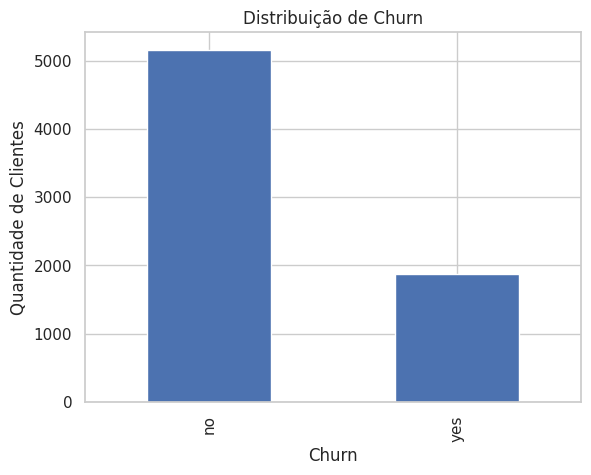

In [109]:
import matplotlib.pyplot as plt

churn_counts = df['Churn'].value_counts()

plt.figure()
churn_counts.plot(kind='bar')
plt.title('Distribuição de Churn')
plt.xlabel('Churn')
plt.ylabel('Quantidade de Clientes')
plt.show()


3.2.3.2 - Gráfico de Pizza

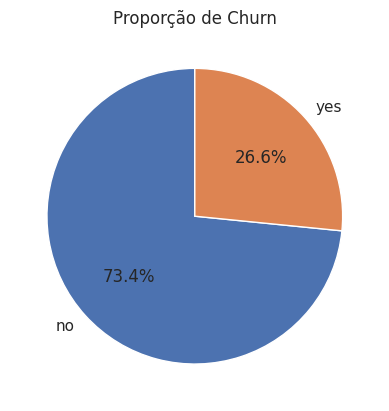

In [110]:
plt.figure()
churn_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proporção de Churn')
plt.ylabel('')
plt.show()


3.2.3.3 - Gráfico de barra - Seaborn

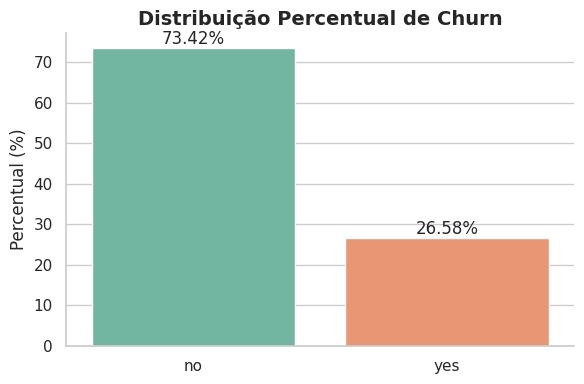

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", font="sans-serif")

churn_pct = (
  df['Churn']
  .value_counts(normalize=True)
  .mul(100)
  .reset_index()
)
churn_pct.columns = ['Churn', 'Percentual']

plt.figure(figsize=(6, 4))
ax = sns.barplot(
  data=churn_pct,
  x='Churn',
  y='Percentual',
  hue='Churn',
  palette='Set2'
)

sns.despine()

ax.set_title('Distribuição Percentual de Churn', fontsize=14, weight='bold')
ax.set_xlabel('')
ax.set_ylabel('Percentual (%)')

for p in ax.patches:
  ax.annotate(
    f'{p.get_height():.2f}%',
    (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center',
    va='bottom'
)

plt.tight_layout()
plt.show()



3.3 - CONTAGEM DE EVASÃO POR VARIÁVEIS CATEGÓRICAS

3.3.1 - Todas as variaveis categoricas

In [112]:
# Variáveis Categóricas
cat_cols = [
    'customer_gender',
    'customer_senior',
    'customer_partner',
    'customer_dependents',
    'phone_service',
    'phone_multiple_lines',
    'internet_service',
    'internet_online_security',
    'internet_online_backup',
    'internet_device_protection',
    'internet_tech_support',
    'internet_streaming_tv',
    'internet_streaming_movies',
    'account_contract',
    'account_paperless_billing',
    'account_payment_method'
]


3.3.2 - Percentual de churn dentro de cada categoria

In [113]:
# Tabela resumo de churn por customer_gender

for col in cat_cols:
    print('\n' + '='*70)
    print(f'VARIÁVEL: {col}')
    print('='*70)

    # Tabela base
    tabela = (
        df
        .groupby(col)['Churn']
        .value_counts()
        .unstack(fill_value=0)
    )

    # Garantir colunas no / yes
    if 'no' not in tabela.columns:
        tabela['no'] = 0
    if 'yes' not in tabela.columns:
        tabela['yes'] = 0

    # Construir tabela final
    tabela_final = pd.DataFrame({
        'total': tabela['no'] + tabela['yes'],
        'churn_no': tabela['no'],
        'churn_yes': tabela['yes'],
        'churn_yes_%': ((tabela['yes'] / (tabela['no'] + tabela['yes'])) * 100).round(2)
    })

    display(tabela_final)





VARIÁVEL: customer_gender


,total,churn_no,churn_yes,churn_yes_%
customer_gender,,,,
female,3483,2544,939,26.96
male,3549,2619,930,26.20



VARIÁVEL: customer_senior


,total,churn_no,churn_yes,churn_yes_%
customer_senior,,,,
0,5890,4497,1393,23.65
1,1142,666,476,41.68



VARIÁVEL: customer_partner


,total,churn_no,churn_yes,churn_yes_%
customer_partner,,,,
0,3639,2439,1200,32.98
1,3393,2724,669,19.72



VARIÁVEL: customer_dependents


,total,churn_no,churn_yes,churn_yes_%
customer_dependents,,,,
0,4933,3390,1543,31.28
1,2099,1773,326,15.53



VARIÁVEL: phone_service


,total,churn_no,churn_yes,churn_yes_%
phone_service,,,,
0,680,510,170,25.00
1,6352,4653,1699,26.75



VARIÁVEL: phone_multiple_lines


,total,churn_no,churn_yes,churn_yes_%
phone_multiple_lines,,,,
no,3385,2536,849,25.08
no phone service,680,510,170,25.00
yes,2967,2117,850,28.65



VARIÁVEL: internet_service


,total,churn_no,churn_yes,churn_yes_%
internet_service,,,,
dsl,2416,1957,459,19.00
fiber optic,3096,1799,1297,41.89
no,1520,1407,113,7.43



VARIÁVEL: internet_online_security


,total,churn_no,churn_yes,churn_yes_%
internet_online_security,,,,
no,3497,2036,1461,41.78
no internet service,1520,1407,113,7.43
yes,2015,1720,295,14.64



VARIÁVEL: internet_online_backup


,total,churn_no,churn_yes,churn_yes_%
internet_online_backup,,,,
no,3087,1854,1233,39.94
no internet service,1520,1407,113,7.43
yes,2425,1902,523,21.57



VARIÁVEL: internet_device_protection


,total,churn_no,churn_yes,churn_yes_%
internet_device_protection,,,,
no,3094,1883,1211,39.14
no internet service,1520,1407,113,7.43
yes,2418,1873,545,22.54



VARIÁVEL: internet_tech_support


,total,churn_no,churn_yes,churn_yes_%
internet_tech_support,,,,
no,3472,2026,1446,41.65
no internet service,1520,1407,113,7.43
yes,2040,1730,310,15.20



VARIÁVEL: internet_streaming_tv


,total,churn_no,churn_yes,churn_yes_%
internet_streaming_tv,,,,
no,2809,1867,942,33.54
no internet service,1520,1407,113,7.43
yes,2703,1889,814,30.11



VARIÁVEL: internet_streaming_movies


,total,churn_no,churn_yes,churn_yes_%
internet_streaming_movies,,,,
no,2781,1843,938,33.73
no internet service,1520,1407,113,7.43
yes,2731,1913,818,29.95



VARIÁVEL: account_contract


,total,churn_no,churn_yes,churn_yes_%
account_contract,,,,
month-to-month,3875,2220,1655,42.71
one year,1472,1306,166,11.28
two year,1685,1637,48,2.85



VARIÁVEL: account_paperless_billing


,total,churn_no,churn_yes,churn_yes_%
account_paperless_billing,,,,
0,2864,2395,469,16.38
1,4168,2768,1400,33.59



VARIÁVEL: account_payment_method


,total,churn_no,churn_yes,churn_yes_%
account_payment_method,,,,
bank transfer (automatic),1542,1284,258,16.73
credit card (automatic),1521,1289,232,15.25
electronic check,2365,1294,1071,45.29
mailed check,1604,1296,308,19.20


3.3.2 - Síntese analítica e ranking por grupo

3.4 - CONTAGEM DE EVASÃO POR VARIÁVEIS NUMÉRICAS

3.4.1 - Todas as variáveis numéricas

In [114]:
# Variáveis Numéricas
num_cols = [
    'customer_tenure',
    'charges_monthly',
    'charges_total',
    'contas_diarias'
]


3.4.2 - Análise descritiva das variáveis numéricas por churn

In [115]:
# Comparar no vs yes nas variáveis numéricas por média/mediana/etc.
for col in num_cols:
    print('\n' + '='*50)
    print(f'VARIÁVEL NUMÉRICA: {col}')
    print('='*50)
    display(
        df.groupby('Churn')[col]
          .describe()
          .round(2)
    )




VARIÁVEL NUMÉRICA: customer_tenure


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
no,5163.0,37.65,24.08,1.0,15.0,38.0,61.0,72.0
yes,1869.0,17.98,19.53,1.0,2.0,10.0,29.0,72.0



VARIÁVEL NUMÉRICA: charges_monthly


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
no,5163.0,61.31,31.09,18.25,25.10,64.45,88.48,118.75
yes,1869.0,74.44,24.67,18.85,56.15,79.65,94.20,118.35



VARIÁVEL NUMÉRICA: charges_total


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
no,5163.0,2555.34,2329.46,18.80,577.83,1683.60,4264.12,8672.45
yes,1869.0,1531.80,1890.82,18.85,134.50,703.55,2331.30,8684.80



VARIÁVEL NUMÉRICA: contas_diarias


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
no,5163.0,2.04,1.04,0.61,0.84,2.15,2.95,3.96
yes,1869.0,2.48,0.82,0.63,1.87,2.66,3.14,3.94


3.4.3 - Boxplot por variável

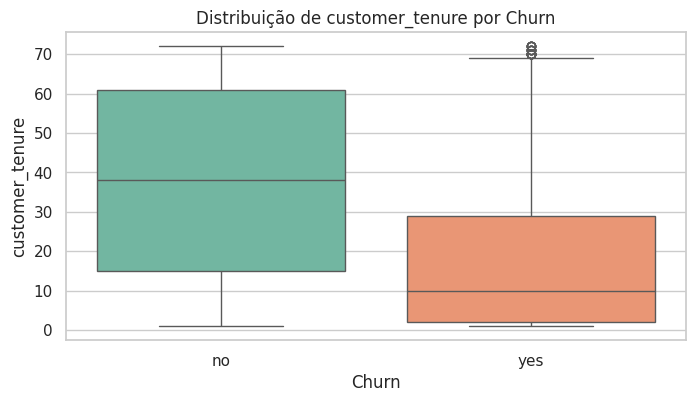

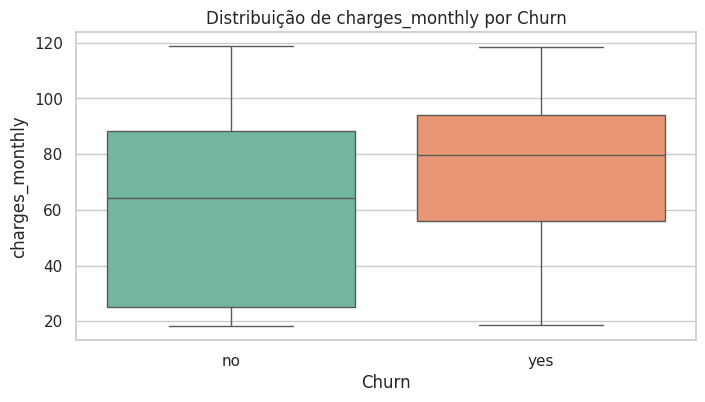

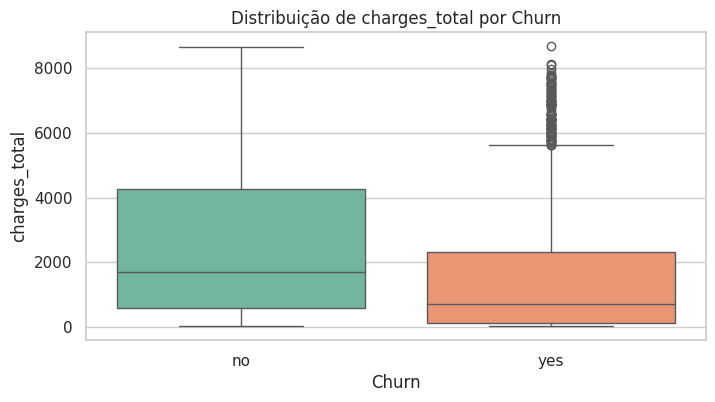

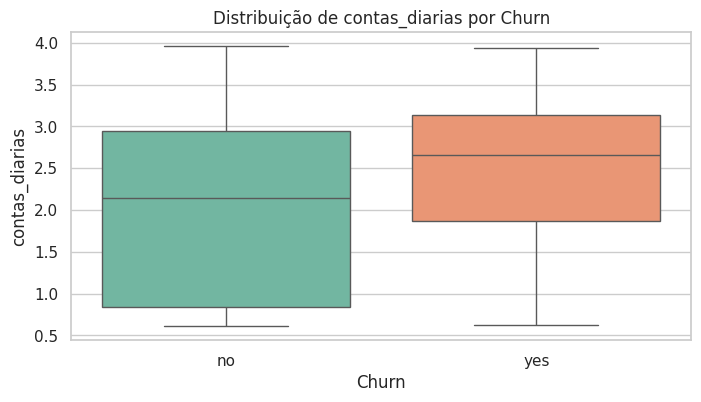

In [116]:
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(
        data=df,
        x='Churn',
        y=col,
        hue='Churn',
        palette='Set2',
        legend=False
    )
    plt.title(f'Distribuição de {col} por Churn')
    plt.show()



3.5 - ANÁLISE DE CORRELAÇÃO ENTRE VARIÁVEIS

3.5.1 - Preparação dos dados para correlação

In [117]:
# Correlação exige variáveis numéricas.
# Como Churn é categórica (no / yes), precisamos convertê-la para binário.

df_corr = df.copy()
df_corr['Churn_bin'] = df_corr['Churn'].map({'no': 0, 'yes': 1})


3.5.2 - Matriz de correlação (numéricas + churn)


In [118]:
# Variaveis relevantes
corr_cols = [
    'customer_tenure',
    'charges_monthly',
    'charges_total',
    'contas_diarias',
    'Churn_bin'
]

corr_matrix = df_corr[corr_cols].corr().round(2)
corr_matrix


,customer_tenure,charges_monthly,charges_total,contas_diarias,Churn_bin
customer_tenure,1.00,0.25,0.83,0.25,-0.35
charges_monthly,0.25,1.00,0.65,1.00,0.19
charges_total,0.83,0.65,1.00,0.65,-0.20
contas_diarias,0.25,1.00,0.65,1.00,0.19
Churn_bin,-0.35,0.19,-0.20,0.19,1.00


3.5.3 – Visualização da correlação (Heatmap)

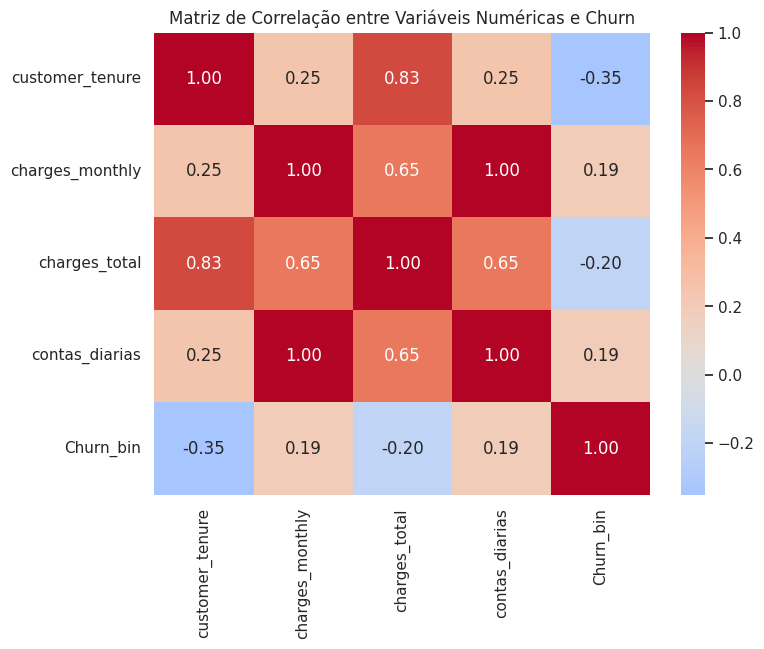

In [119]:
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    center=0
)
plt.title('Matriz de Correlação entre Variáveis Numéricas e Churn')
plt.show()


3.5.4 - Conta diária × Churn (dispersão)

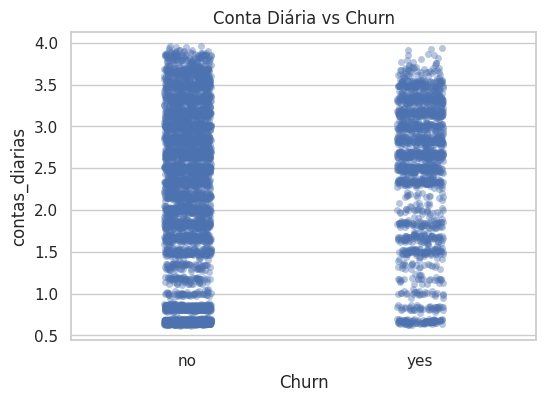

In [120]:
plt.figure(figsize=(6,4))
sns.stripplot(
    data=df_corr,
    x='Churn',
    y='contas_diarias',
    jitter=True,
    alpha=0.4
)
plt.title('Conta Diária vs Churn')
plt.show()


3.5.5 – Quantidade de serviços × Churn (opcional avançado)

In [121]:
df_corr['num_services'] = (
    (df_corr['phone_service'] == 1).astype(int) +
    (df_corr['internet_service'] != 'no').astype(int) +
    (df_corr['internet_online_security'] == 'yes').astype(int) +
    (df_corr['internet_online_backup'] == 'yes').astype(int) +
    (df_corr['internet_device_protection'] == 'yes').astype(int) +
    (df_corr['internet_tech_support'] == 'yes').astype(int) +
    (df_corr['internet_streaming_tv'] == 'yes').astype(int) +
    (df_corr['internet_streaming_movies'] == 'yes').astype(int)
)


In [122]:
df_corr[['num_services', 'Churn_bin']].corr().round(2)


,num_services,Churn_bin
num_services,1.00,-0.03
Churn_bin,-0.03,1.00


# Relatório Final – Análise de Evasão de Clientes (Churn)

### Projeto: TelecomX_BR

# 1. Introdução

A evasão de clientes (churn) é um dos principais desafios enfrentados por empresas de telecomunicações, pois impacta diretamente a receita, o crescimento sustentável e os custos de aquisição de novos clientes. Em mercados altamente competitivos, compreender por que os clientes cancelam seus serviços é essencial para direcionar estratégias eficazes de retenção.


Este trabalho tem como objetivo realizar uma Análise Exploratória de Dados (EDA) sobre a base de clientes da TelecomX, buscando identificar padrões, perfis e fatores associados à evasão, com foco especial na segmentação das variáveis em blocos funcionais de negócio:


Customer – Perfil do cliente

Phone – Serviços de telefonia

Internet – Serviços de internet

Account – Contratos e formas de pagamento

A análise é inteiramente baseada nos dados disponíveis, sem modelagem preditiva, priorizando clareza analítica, robustez estatística e interpretação orientada ao negócio.

# 2. Fonte dos Dados e Extração

Os dados foram obtidos a partir de um arquivo em formato JSON, disponibilizado publicamente no repositório GitHub do desafio. A leitura foi realizada diretamente via URL, utilizando bibliotecas padrão do ecossistema Python (pandas, numpy).


A base original continha:

7.267 registros

21 variáveis, incluindo informações demográficas, contratuais, financeiras e de serviços

## 3. Limpeza e Tratamento dos Dados (ETL)

Antes das análises, foi executado um processo cuidadoso de limpeza e preparação dos dados, com as seguintes etapas:


3.1 Tratamento da variável Churn:

Foram identificados 224 registros com valor ausente na variável Churn;

Esses registros foram removidos para garantir consistência nas análises de evasão.


3.2 Conversão de variáveis numéricas:

A variável charges_total apresentou 11 valores inválidos;

Foi aplicada conversão segura;

Os registros inconsistentes foram removidos.


3.3 Base final analisada:

Após o tratamento, a base passou a conter 7.032 registros válidos.

Esse processo assegura que todas as análises subsequentes sejam baseadas em dados consistentes e confiaveis.

# 4. Análise Exploratória de Dados (EDA)

4.1 Distribuição Geral do Churn

A distribuição da variável Churn revelou:


Clientes que permaneceram (no): 73,42%


Clientes que evadiram (yes): 26,58%

Esse percentual indica um nível relevante de evasão, justificando uma análise aprofundada dos fatores associados.

4.2 Análise de Churn por Blocos de Variáveis

Em vez de analisar variáveis de forma isolada, optou-se por uma abordagem estruturada por blocos funcionais, refletindo melhor a lógica operacional do negocio.

🔹 Bloco A – Perfil do Cliente (Customer)

Variáveis analisadas:

customer_gender

customer_senior

customer_partner

customer_dependentes

Principais achados:

Gênero apresentou taxas de churn praticamente idênticas, indicando irrelevância estatística;

Clientes idosos (senior) apresentaram churn significativamente maior;

Clientes sem parceiro e sem dependente evadem mais.


Insight do bloco:
Fatores sociais e de estabilidade familiar estão fortemente associados à retenção.

Clientes com vinculos familiares tendem a manter contratos por mais tempo.

🔹 Bloco B – Serviços de Telefonia (Phone)

Variáveis analisadas:

phone_service

phone_multiple_lines

Principais achados:

Diferenças de churn entre as categorias são pequenas;

Telefonia não se destaca como fator crítico de evasão.



Insight do bloco:

Os serviços de telefonia são relativamente estáveis e não representam o principal risco de churn no negocio.

🔹 Bloco C – Serviços de Internet (Internet)

Variáveis analisadas:

internet_service

internet_online_security

internet_online_backup

internet_device_protection

internet_tech_support

internet_streaming_tv

internet_streaming_movies

Principais achados:

Clientes com internet fiber optic apresentaram churn elevado (~42%).

Ausência de online security e tech support está associada a taxas de evasão acima de 40%.

Serviços de internet apresentam forte correlação interna, indicando efeito sistêmico


Insight: O churn não está ligado a um serviço especifico, mas à experiência global com o pacote de internet, especialmente quando combinada a preços elevados e ausência de suporte.

Este é o principal bloco de risco da empresa.


🔹 Bloco D – Contrato e Pagamento (Account)

Variáveis analisadas:

account_contract

account_payment_method

account_paperless_billing

Principais achados:

Contratos month-to-month apresentam churn extremamente elevado (~43%).

O pagamento via electronic check concentra o maior risco (~45%).

Contratos de longo prazo reduzem drasticamente a evasão.

Insight do bloco:

O modelo contratual e a forma de pagamento são determinantes diretos da evasão, mais fortes que fatores demográficos.

4.3 Análise de Variáveis Numéricas

As variáveis numéricas foram analisadas separando clientes que evadiram e os que permaneceram, com uso de estatisticas descritivas e boxplots.

Principais resultados:

  Tempo de contrato (custome_tenure):
  
    Mediana de churn = 10 meses
    Mediana não churn = 38 meses
    indica que a evasão ocorre precocemente.



  Custo mensal (charges_monthly):
  
    Média de churn = 74,44
    Média não churn = 61,31.


  Custo total (charges_total):
    
    Clientes que apresentam evasão (churn) tendem a acumular um gasto total menor ao longo do tempo, não por aderirem a planos mais baratos, mas principalmente por permanecerem menos tempo na base de clientes.


  Custo diário (contas_diarias):

    Clientes que evadem apresentam custo médio maior.


Insight:

Clientes que pagam mais e permanecem menos tempo são mais propensos à evasão, reforçando a sensibilidade a preço.

## 5. Conclusões e Insights

A análise revela que o churn é um fenômeno multifatorial, mas fortemente concentrado em dois eixos principais:

a) Modelo contratual e financeiro;

b) Experiência com serviços de internet.

A abordagem por blocos demonstrou que:

Variáveis de internet são interdependentes

O churn não deve ser tratado como problema isolado de um único serviço

A evasão ocorre, majoritariamente, nos primeiros meses de contrato



# 6. Recomendações Estratégicas

Com base nos achados, recomenda-se:

a) Estratégias contratuais:

  Incentivar a migração de contratos month-to-month para planos de longo prazo
  
  Oferecer benefícios progressivos por tempo de permanência.


b) Revisão do produto Internet:

  Reavaliar custo x valor percebido do fiber optic
  
  Criar pacotes de internet com segurança e suporte inclusos.

c) Ações de retenção precoce

  Monitorar clientes nos primeiros 12 meses

  Oferecer suporte proativo e ofertas direcionadas


d) Estratégias de pagamento

  Reduzir dependência do electronic check

  Incentivar pagamentos automáticos com beneficios